In [1]:
# Do all important inputs

import brian2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Number of input, excitatory and inhibitory neurons
N_NEURON_INP = 10
N_NEURON_L1 = 10

# Connectivity ratio for pools of neurons of different type
P_CONN_INP_L1 = 1.0
P_CONN_L1_L1 = 0.5

# Connectivity strengths
STR_INP_L1  = [0.2, 1.0]
STR_L1_L1   = [-1.0, 1.0]

# Number of connections corresponding to the above probabilities
N_CONN_INP_L1 = int(P_CONN_INP_L1  * N_NEURON_INP)
N_CONN_L1_L1  = int(P_CONN_L1_L1 * N_NEURON_L1)

# Generate connectivity maps
# Connect each neuron of pool 1 with exactly N_CONN randomly selected neurons from pool 2
CONN_INP_L1 = np.array([sorted(np.random.permutation(N_NEURON_L1)[:N_CONN_INP_L1]) for i in range(N_NEURON_INP)])
CONN_L1_L1  = np.array([sorted(np.random.permutation(N_NEURON_L1)[:N_CONN_L1_L1])  for i in range(N_NEURON_L1)])

# Generate connectivity matrices
MAT_INP_L1 = np.zeros([N_NEURON_INP, N_NEURON_L1])
MAT_L1_L1  = np.zeros([N_NEURON_L1, N_NEURON_L1])

for iConn in range(N_NEURON_INP):
    for jConn in CONN_INP_L1[iConn]:
        MAT_INP_L1[iConn, jConn] = np.random.uniform(STR_INP_L1[0], STR_INP_L1[1])

for iConn in range(N_NEURON_L1):
    for jConn in CONN_L1_L1[iConn]:
        MAT_L1_L1[iConn, jConn] = np.random.uniform(STR_L1_L1[0], STR_L1_L1[1])

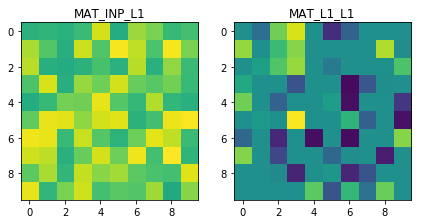

In [4]:
# Display the connectivity matrices

fig, axs = plt.subplots(ncols=2, figsize=(7, 7))
axs[0].set_title('MAT_INP_L1')
axs[0].imshow(MAT_INP_L1, vmin=-1, vmax=1)
axs[1].set_title('MAT_L1_L1')
axs[1].imshow(MAT_L1_L1, vmin=-1, vmax=1)
plt.show()

In [ ]:
membranePotL1 = np.zeros(N_NEURON_L1)
thresholdsL1 = np.zeros(N_NEURON_L1)
estRatesL1 = np.zeros(N_NEURON_L1)
expRatesL1 = np.zeros(N_NEURON_L1) + 0.2
expRatesChangeRate = 1.0 / 20.0
thresholdChangeRate = 1.0 / 100.0

def timeStep(V, I, T, R, WI, WL):
    # Calculate the new potential from the old one
    Vnew = (WI.dot(I) + WL.dot(V) > T).astype(int)
    
    # Update the rate
    Rnew = (1 - expRatesChangeRate) * R + expRatesChangeRate * Vnew
    
    # Update the threshold
    Tnew = T
    for i in range(len(Tnew)):
        if Rnew[i] < expRatesL1[i]:
            T[i] -= thresholdChangeRate
        else
            T[i] += thresholdChangeRate
            
    return Vnew, Tnew, Rnew


Input = np.array([1] + [0]*(N_NEURON_INP-1))
NSteps = 1000

for i in range(NSteps):
    membranePotL1, thresholdsL1, estRatesL1 = timeStep(membranePotL1, Input, thresholdsL1, estRatesL1, MAT_INP_L1, MAT_L1_L1)
    
    
    

In [10]:
aaa = np.array([1,2,3,4,5])
print((aaa > 3).astype(int))

[0 0 0 1 1]
